# Project: Investigating key film information over time

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I am investigating the film data set to see what variables are correlated to changing taste or style over time. The film industry has evolved in many ways over time, and I am interested in seeing how consumer's taste has changed over time as well.

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Load and inspect data
df = pd.read_csv('movies.csv')

df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning 



### What Information do I Need?
I have 3 main questions I am interested in exploring: 
1) Are certain film genres liked on average more than others?
2) Are current films graded harder than older movies?
3) Have our shortening attention spans over time affected the film industry's delivery of films?



### Cleanup steps
1) Format genres and create a new column with the primary genre listed (1st one listed in cluster)
    -Refine as results need (remove NaN, etc.)

2) Remove columns I will not be using for my data analysis

3) Remove duplicates and drop null values

In [4]:
# Making a new column that has only the first (and primary) genre listed
df['genres_new'] = df['genres'].str.split('|').str[0]

In [5]:
# Dropping columns that will not be relevant to my analysis
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget', 'revenue', 'cast', 'director', 'release_date', 'genres', 'production_companies'], axis=1, inplace=True)

In [6]:
# Remove rows with Na values
df.dropna(inplace=True)

In [7]:
# Remove any possible duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Verify data is in a good form for analyzing
df.head()

,id,popularity,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_new
0,135397,32.985763,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,28.419936,Mad Max: Fury Road,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,13.112507,Insurgent,119,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,11.173104,Star Wars: The Force Awakens,136,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,9.335014,Furious 7,137,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


<a id='eda'></a>
# Exploratory Data Analysis

## Question 1:
### How are films graded over time?

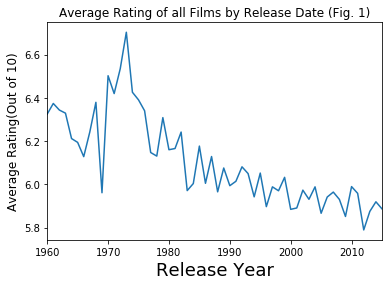

In [9]:
# Group data by release year and vote average, and calculate average rating per release year & plot results

release_means = df.groupby(['release_year'])['vote_average'].mean()
release_means.plot(kind='line', title='Average Rating of all Films by Release Date (Fig. 1)')
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Average Rating(Out of 10)', fontsize=12);

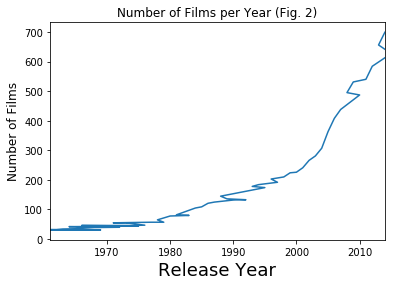

In [10]:
# Plot data of number of films released per year

df['release_year'].value_counts().plot(kind='line', title='Number of Films per Year (Fig. 2)')
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Number of Films', fontsize=12);

## Question 2:

### Are certain film genres liked more than others??

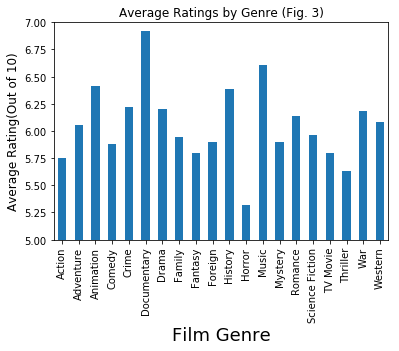

In [11]:
# Group new genre column and vote average, and plot 

genre_ratings = df.groupby(['genres_new'])['vote_average'].mean()
genre_ratings.plot(kind='bar', title='Average Ratings by Genre (Fig. 3)')
axes = plt.gca()
axes.set_ylim([5,7])
plt.xlabel('Film Genre', fontsize=18)
plt.ylabel('Average Rating(Out of 10)', fontsize=12);

## Question 3:

### Are films getting shorter over time?

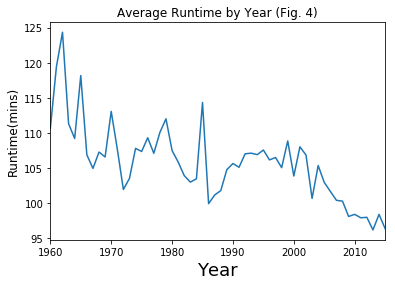

In [12]:
# Group data by runtime and release year and plot

genre_ratings = df.groupby(['release_year'])['runtime'].mean()
genre_ratings.plot(kind='line', title='Average Runtime by Year (Fig. 4)')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Runtime(mins)', fontsize=12);

<a id='conclusions'></a>
## Conclusions

### Question 1: How are films graded over time?

Conclusion: There seems to be a correlation to films being graded lower over time. This correlation could be connected to a multitude of factors.

One factor is the lack of large data the last few decades with regard to film ratings. Much of the data for film ratings of older films is likely more fondly remembered as a past-time event, rather than in the moment reaction.

Another factor is the amount of films consumed over time has steadily increased as seen in figure two. This seems to suggest that consuiming more films forces ratings to be graded relatively to each other, which could result in tougher grading for some films.

Limitations of Conclusion: 1) Lack of data in earlier decades. 2) Ratings for films in previous decades is retro-active vs. real-time for current films which may cause different reactions.

### Question 2: Are certain film genres liked more than others??

Conclusion: The data suggests that documentaries on average are liked the most out of all film genres, whereas horror is the least liked on average.

The average liking for documentaries could seem to suggest that while audiences do enjoy 

Limitations: Original genre field in data set showed multiple genres for each film. After looking closely at the data set, the first genre listed was usually correct. The data used for this assumption is based on the first genre listed assumption of being correct.

### Question 3: Are films getting shorter over time?

Conclusion: Based on the data, films seem to be getting shorter over time. Shortening attention spans, more efficient budgets, and artistic preferences are all factors that potentially are going into this shortening over time.

Limitations: 1)Lack of data in earlier decades 2) It is possible that not all short films in earlier decades were taken into consideration, however they were for current years.


> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

In [13]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0